In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [18]:
import numpy as np
import data_load
import train_util
import train_tl
from importlib import reload

import tensorflow.keras as keras
from tensorflow.keras import applications
from tensorflow.keras.layers import Flatten, LeakyReLU, Dense
from tensorflow.keras.models import *
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import datetime


# training data
image_size = 224
#labels = pd.read_csv("data/fgvc7/train.csv")
image_dir = "data/leaf"


tf.random.set_seed(1234)
np.random.seed(seed=1234)

In [83]:
from tensorflow.keras import applications
base_model = applications.EfficientNetB0(weights='imagenet', input_shape=(image_size, image_size, 3),  include_top=False)

# Create new model on top.
inputs = keras.Input(shape=(image_size, image_size, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(.2)(x)
outputs = keras.layers.Dense(512)(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
global_average_pooling2d_8 ( (None, 1280)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               655872    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
Total params: 4,968,099
Trainable params: 4,926,076
Non-trainable params: 42,023
______________________________________

In [84]:
# import training data and combine labels
data = data_load.load_unlabeled_data(image_size, image_dir) 
print(len(data))

4502


In [85]:
warmup_epoch = 5
total_epoch = 50
lr = 0.001
temperature = 0.1

model = train_util.train(model = model, data = data, batch_size = 32, warmup_epoch = warmup_epoch, total_epoch = total_epoch, lr = lr,  temperature=temperature)

********************************************************************
**                        Warmup Epoch: 0                         **
********************************************************************
Iter: 10 Step: 10 Loss: 1.79281 LR:  0.000990
Iter: 20 Step: 20 Loss: 1.06946 LR:  0.000956
Iter: 30 Step: 30 Loss: 0.91818 LR:  0.000899
Iter: 40 Step: 40 Loss: 0.82452 LR:  0.000823
Iter: 50 Step: 50 Loss: 0.70062 LR:  0.000730
Iter: 60 Step: 60 Loss: 0.62954 LR:  0.000627
Iter: 70 Step: 70 Loss: 0.56313 LR:  0.000517
Iter: 80 Step: 80 Loss: 0.58411 LR:  0.000406
Iter: 90 Step: 90 Loss: 0.79130 LR:  0.000300
Iter: 100 Step: 100 Loss: 0.48297 LR:  0.000203
Iter: 110 Step: 110 Loss: 0.65179 LR:  0.000122
Iter: 120 Step: 120 Loss: 0.45586 LR:  0.000059
Iter: 130 Step: 130 Loss: 0.61845 LR:  0.000018
Iter: 140 Step: 140 Loss: 0.54803 LR:  0.000000
Saved checkpoint for Epoch 0: models/efficientnetb0_2021_02_12_checkpoints\ckpt-1
loss 0.89
***********************************************

Iter: 90 Step: 90 Loss: 0.33783 LR:  0.000300
Iter: 100 Step: 100 Loss: 0.37649 LR:  0.000203
Iter: 110 Step: 110 Loss: 0.39878 LR:  0.000122
Iter: 120 Step: 120 Loss: 0.23178 LR:  0.000059
Iter: 130 Step: 130 Loss: 0.25060 LR:  0.000018
Iter: 140 Step: 140 Loss: 0.25053 LR:  0.000000
Saved checkpoint for Epoch 3: models/efficientnetb0_2021_02_12_checkpoints\ckpt-9
loss 0.18
********************************************************************
**                               Epoch: 4                         **
********************************************************************
Iter: 10 Step: 10 Loss: 0.27303 LR:  0.000990
Iter: 20 Step: 20 Loss: 0.19211 LR:  0.000956
Iter: 30 Step: 30 Loss: 0.24337 LR:  0.000899
Iter: 40 Step: 40 Loss: 0.14018 LR:  0.000823
Iter: 50 Step: 50 Loss: 0.32193 LR:  0.000730
Iter: 60 Step: 60 Loss: 0.28772 LR:  0.000627
Iter: 70 Step: 70 Loss: 0.28325 LR:  0.000517
Iter: 80 Step: 80 Loss: 0.28863 LR:  0.000406
Iter: 90 Step: 90 Loss: 0.20264 LR:  0.000300
I

Iter: 10 Step: 10 Loss: 0.18065 LR:  0.000990
Iter: 20 Step: 20 Loss: 0.20976 LR:  0.000956
Iter: 30 Step: 30 Loss: 0.19577 LR:  0.000899
Iter: 40 Step: 40 Loss: 0.24191 LR:  0.000823
Iter: 50 Step: 50 Loss: 0.16498 LR:  0.000730
Iter: 60 Step: 60 Loss: 0.15587 LR:  0.000627
Iter: 70 Step: 70 Loss: 0.15081 LR:  0.000517
Iter: 80 Step: 80 Loss: 0.21557 LR:  0.000406
Iter: 90 Step: 90 Loss: 0.14315 LR:  0.000300
Iter: 100 Step: 100 Loss: 0.21177 LR:  0.000203
Iter: 110 Step: 110 Loss: 0.16171 LR:  0.000122
Iter: 120 Step: 120 Loss: 0.21671 LR:  0.000059
Iter: 130 Step: 130 Loss: 0.23597 LR:  0.000018
Iter: 140 Step: 140 Loss: 0.25507 LR:  0.000000
Saved checkpoint for Epoch 12: models/efficientnetb0_2021_02_12_checkpoints\ckpt-18
loss 0.12
********************************************************************
**                               Epoch: 13                         **
********************************************************************
Iter: 10 Step: 10 Loss: 0.27733 LR:  0.00099

Iter: 130 Step: 130 Loss: 0.09908 LR:  0.000018
Iter: 140 Step: 140 Loss: 0.13702 LR:  0.000000
Saved checkpoint for Epoch 20: models/efficientnetb0_2021_02_12_checkpoints\ckpt-26
loss 0.20
********************************************************************
**                               Epoch: 21                         **
********************************************************************
Iter: 10 Step: 10 Loss: 0.11616 LR:  0.000990
Iter: 20 Step: 20 Loss: 0.22882 LR:  0.000956
Iter: 30 Step: 30 Loss: 0.18469 LR:  0.000899
Iter: 40 Step: 40 Loss: 0.14847 LR:  0.000823
Iter: 50 Step: 50 Loss: 0.12594 LR:  0.000730
Iter: 60 Step: 60 Loss: 0.07954 LR:  0.000627
Iter: 70 Step: 70 Loss: 0.12422 LR:  0.000517
Iter: 80 Step: 80 Loss: 0.16247 LR:  0.000406
Iter: 90 Step: 90 Loss: 0.12415 LR:  0.000300
Iter: 100 Step: 100 Loss: 0.13404 LR:  0.000203
Iter: 110 Step: 110 Loss: 0.10554 LR:  0.000122
Iter: 120 Step: 120 Loss: 0.11851 LR:  0.000059
Iter: 130 Step: 130 Loss: 0.10349 LR:  0.000

Iter: 50 Step: 50 Loss: 0.10011 LR:  0.000730
Iter: 60 Step: 60 Loss: 0.11834 LR:  0.000627
Iter: 70 Step: 70 Loss: 0.13692 LR:  0.000517
Iter: 80 Step: 80 Loss: 0.11968 LR:  0.000406
Iter: 90 Step: 90 Loss: 0.13014 LR:  0.000300
Iter: 100 Step: 100 Loss: 0.13028 LR:  0.000203
Iter: 110 Step: 110 Loss: 0.10733 LR:  0.000122
Iter: 120 Step: 120 Loss: 0.09949 LR:  0.000059
Iter: 130 Step: 130 Loss: 0.18192 LR:  0.000018
Iter: 140 Step: 140 Loss: 0.10584 LR:  0.000000
Saved checkpoint for Epoch 29: models/efficientnetb0_2021_02_12_checkpoints\ckpt-35
loss 0.21
********************************************************************
**                               Epoch: 30                         **
********************************************************************
Iter: 10 Step: 10 Loss: 0.11243 LR:  0.000990
Iter: 20 Step: 20 Loss: 0.13003 LR:  0.000956
Iter: 30 Step: 30 Loss: 0.10006 LR:  0.000899
Iter: 40 Step: 40 Loss: 0.12913 LR:  0.000823
Iter: 50 Step: 50 Loss: 0.08210 LR:  0.00073

Iter: 10 Step: 10 Loss: 0.12736 LR:  0.000990
Iter: 20 Step: 20 Loss: 0.12614 LR:  0.000956
Iter: 30 Step: 30 Loss: 0.06986 LR:  0.000899
Iter: 40 Step: 40 Loss: 0.11231 LR:  0.000823
Iter: 50 Step: 50 Loss: 0.08204 LR:  0.000730
Iter: 60 Step: 60 Loss: 0.09021 LR:  0.000627
Iter: 70 Step: 70 Loss: 0.08323 LR:  0.000517
Iter: 80 Step: 80 Loss: 0.08440 LR:  0.000406
Iter: 90 Step: 90 Loss: 0.08187 LR:  0.000300
Iter: 100 Step: 100 Loss: 0.09025 LR:  0.000203
Iter: 110 Step: 110 Loss: 0.13552 LR:  0.000122
Iter: 120 Step: 120 Loss: 0.07890 LR:  0.000059
Iter: 130 Step: 130 Loss: 0.07966 LR:  0.000018
Iter: 140 Step: 140 Loss: 0.08946 LR:  0.000000
Saved checkpoint for Epoch 38: models/efficientnetb0_2021_02_12_checkpoints\ckpt-44
loss 0.09
********************************************************************
**                               Epoch: 39                         **
********************************************************************
Iter: 10 Step: 10 Loss: 0.14693 LR:  0.00099

Iter: 130 Step: 130 Loss: 0.10773 LR:  0.000018
Iter: 140 Step: 140 Loss: 0.12882 LR:  0.000000
Saved checkpoint for Epoch 46: models/efficientnetb0_2021_02_12_checkpoints\ckpt-52
loss 0.19
********************************************************************
**                               Epoch: 47                         **
********************************************************************
Iter: 10 Step: 10 Loss: 0.14925 LR:  0.000990
Iter: 20 Step: 20 Loss: 0.11828 LR:  0.000956
Iter: 30 Step: 30 Loss: 0.07652 LR:  0.000899
Iter: 40 Step: 40 Loss: 0.11660 LR:  0.000823
Iter: 50 Step: 50 Loss: 0.08528 LR:  0.000730
Iter: 60 Step: 60 Loss: 0.10047 LR:  0.000627
Iter: 70 Step: 70 Loss: 0.12919 LR:  0.000517
Iter: 80 Step: 80 Loss: 0.08314 LR:  0.000406
Iter: 90 Step: 90 Loss: 0.10186 LR:  0.000300
Iter: 100 Step: 100 Loss: 0.08358 LR:  0.000203
Iter: 110 Step: 110 Loss: 0.12181 LR:  0.000122
Iter: 120 Step: 120 Loss: 0.06714 LR:  0.000059
Iter: 130 Step: 130 Loss: 0.08763 LR:  0.000

In [86]:
wheat_data = data_load.load_unlabeled_data(image_size, image_dir = 'data/wheat') 

In [ ]:
reload(train_util)

model = train_util.train(model = model, data = wheat_data, batch_size = 32, warmup_epoch = 0, total_epoch = 50, lr = lr,  temperature=temperature)

In [89]:
x2 = keras.layers.GlobalAveragePooling2D()(model.layers[1].output)
outputs2 = keras.layers.Dense(4)(x2)
del model2
model2 = keras.Model(model.layers[1].input, outputs2)

Epoch 1/100
20/19 [==============================] - 8s 380ms/step - loss: 2.2989 - sparse_categorical_crossentropy: 2.2989 - val_loss: 1.8965 - val_sparse_categorical_crossentropy: 1.8965
Epoch 2/100
20/19 [==============================] - 6s 310ms/step - loss: 2.0030 - sparse_categorical_crossentropy: 2.0030 - val_loss: 1.8948 - val_sparse_categorical_crossentropy: 1.8948
Epoch 3/100
20/19 [==============================] - 6s 307ms/step - loss: 1.9542 - sparse_categorical_crossentropy: 1.9542 - val_loss: 1.8957 - val_sparse_categorical_crossentropy: 1.8957
Epoch 4/100
20/19 [==============================] - 6s 311ms/step - loss: 1.8806 - sparse_categorical_crossentropy: 1.8806 - val_loss: 1.8942 - val_sparse_categorical_crossentropy: 1.8942
Epoch 5/100
20/19 [==============================] - 6s 307ms/step - loss: 1.9296 - sparse_categorical_crossentropy: 1.9296 - val_loss: 1.8942 - val_sparse_categorical_crossentropy: 1.8942
Epoch 6/100
20/19 [==============================] - 6s

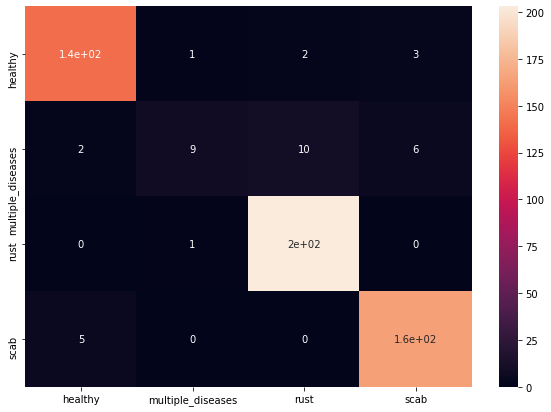

In [90]:
reload(train_tl)

model_name = f'CL_{model.layers[1].name}_{datetime.datetime.now().strftime("%m%d_%H%M")}'
submission_file = f"submissions/{model_name}.csv"
model2, history = train_tl.train_tl(model2, submission_filename = submission_file)

In [92]:
#comments = f'"CL_{model.layers[1].name}_{date.today()}"'
file = f'"{submission_file}"'
layers = [l.weights[0].shape[1] for l in model.layers[3-len(model.layers):] if type(l).__name__ == 'Dense']
comment = f'"{warmup_epoch},{total_epoch},{lr},{temperature},{layers},{len(data)}"'
!kaggle competitions submit -f $file  -m $comment plant-pathology-2020-fgvc7

Successfully submitted to Plant Pathology 2020 - FGVC7


The system cannot find the path specified.

  0%|          | 0.00/105k [00:00<?, ?B/s]
100%|##########| 105k/105k [00:00<00:00, 184kB/s]


In [93]:
!kaggle competitions submissions plant-pathology-2020-fgvc7   
 
model2.save(f'models/{model_name}.pb')

fileName                                   date                 description                         status    publicScore  privateScore  
-----------------------------------------  -------------------  ----------------------------------  --------  -----------  ------------  
CL_efficientnetb0_0212_1819.csv            2021-02-13 01:12:56  5,50,0.001,0.1,[512, 512],4502      complete  0.94293      0.93620       
CL_efficientnetb0_0212_2131.csv            2021-02-12 22:09:54  5,50,0.001,0.1,[512, 512]           complete  0.94315      0.93085       
CL_efficientnetb0_0212_1229.csv            2021-02-12 17:40:36  5,50,0.001,0.1,[512, 128]           complete  0.95205      0.94686       
CL_efficientnetb0_0212_1016.csv            2021-02-12 15:32:54  5,30,0.001,0.1,[512, 128]           complete  0.95425      0.94392       
CL_efficientnetb0_0212_0910.csv            2021-02-12 14:21:06  5,30,0.001,0.1                      complete  0.94326      0.93955       
CL_efficientnetb0_0212_0626.csv   

The system cannot find the path specified.


INFO:tensorflow:Assets written to: models/CL_efficientnetb0_0212_1819.pb\assets


## Grad-Cam test

Predicted: scab


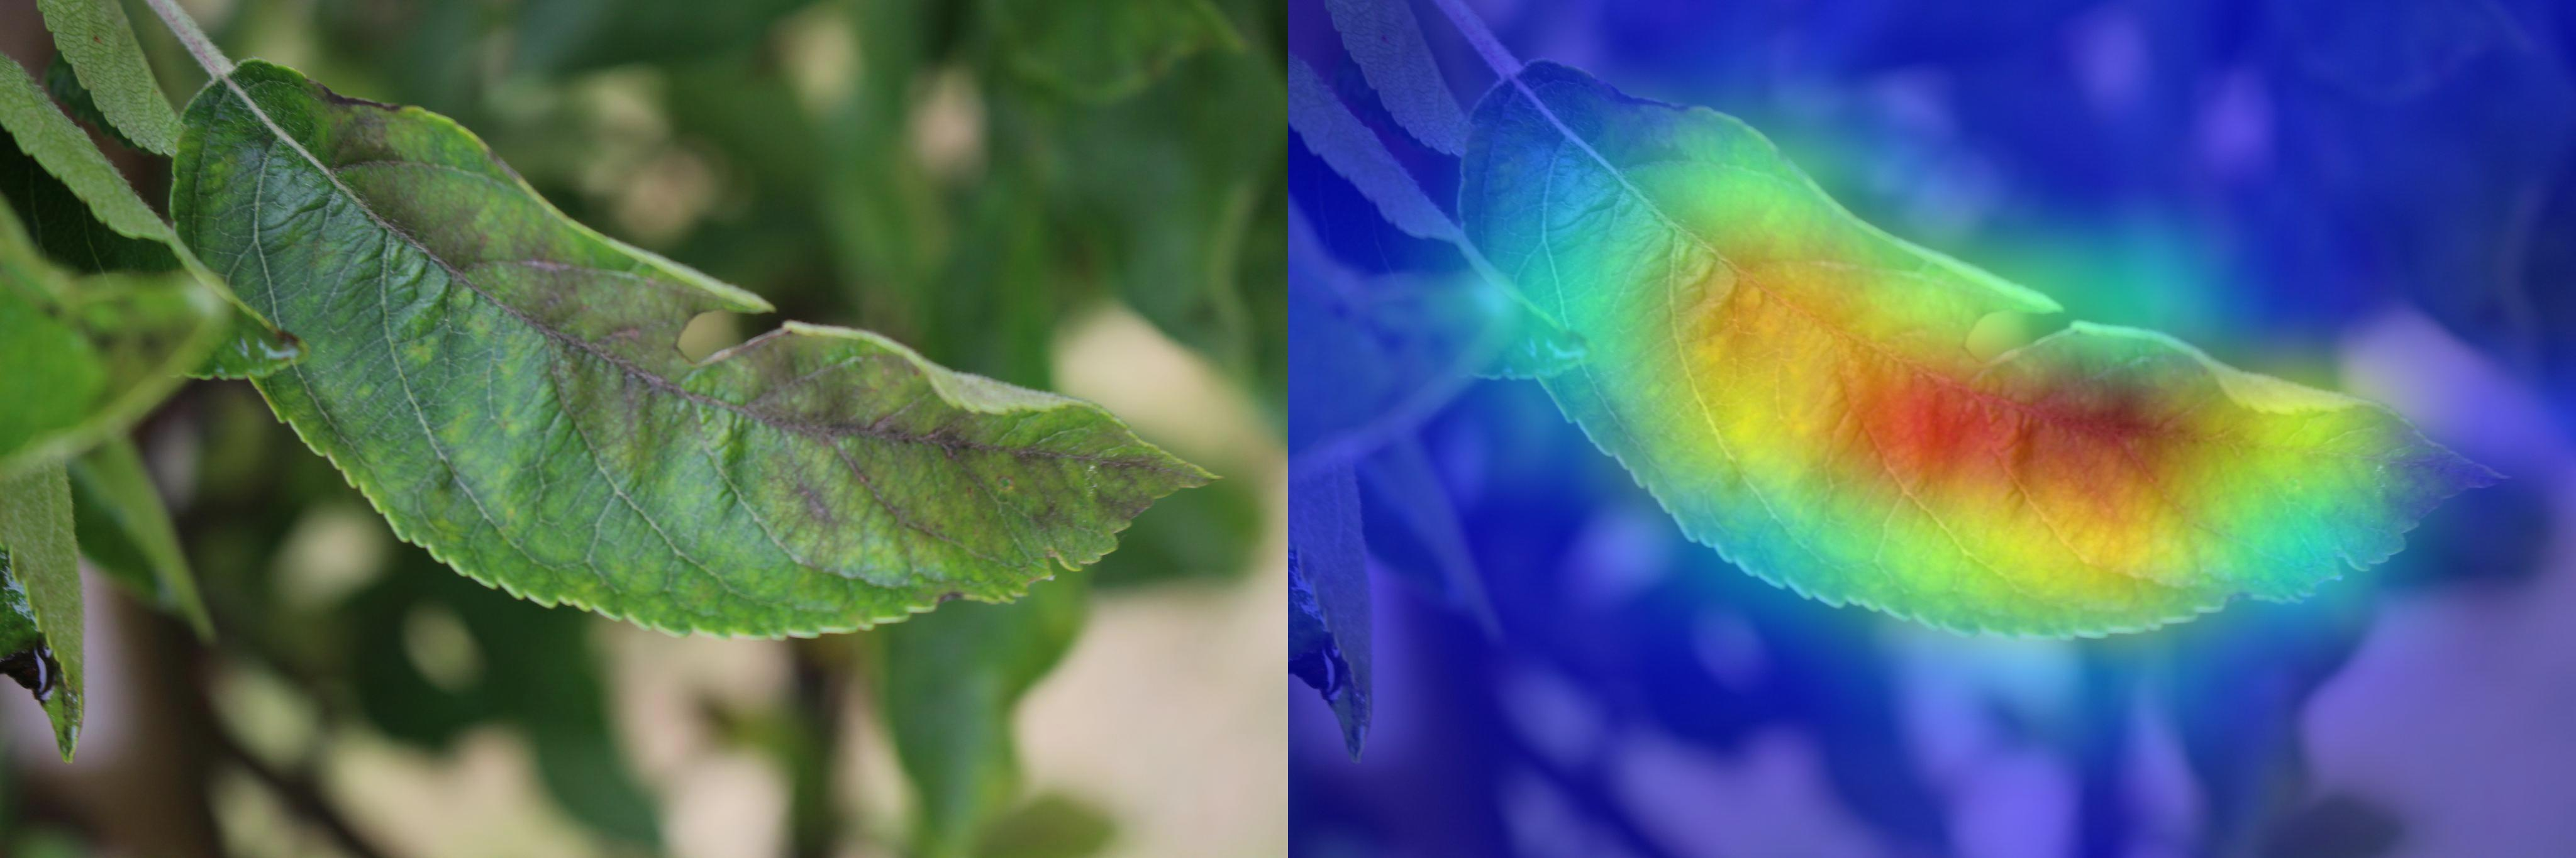

In [101]:
import grad_cam
grad_cam.showGradCam(model2, img_path = r"F:\notebooks\capstone\data\fgvc7\images\Test_2.jpg")

Predicted: healthy


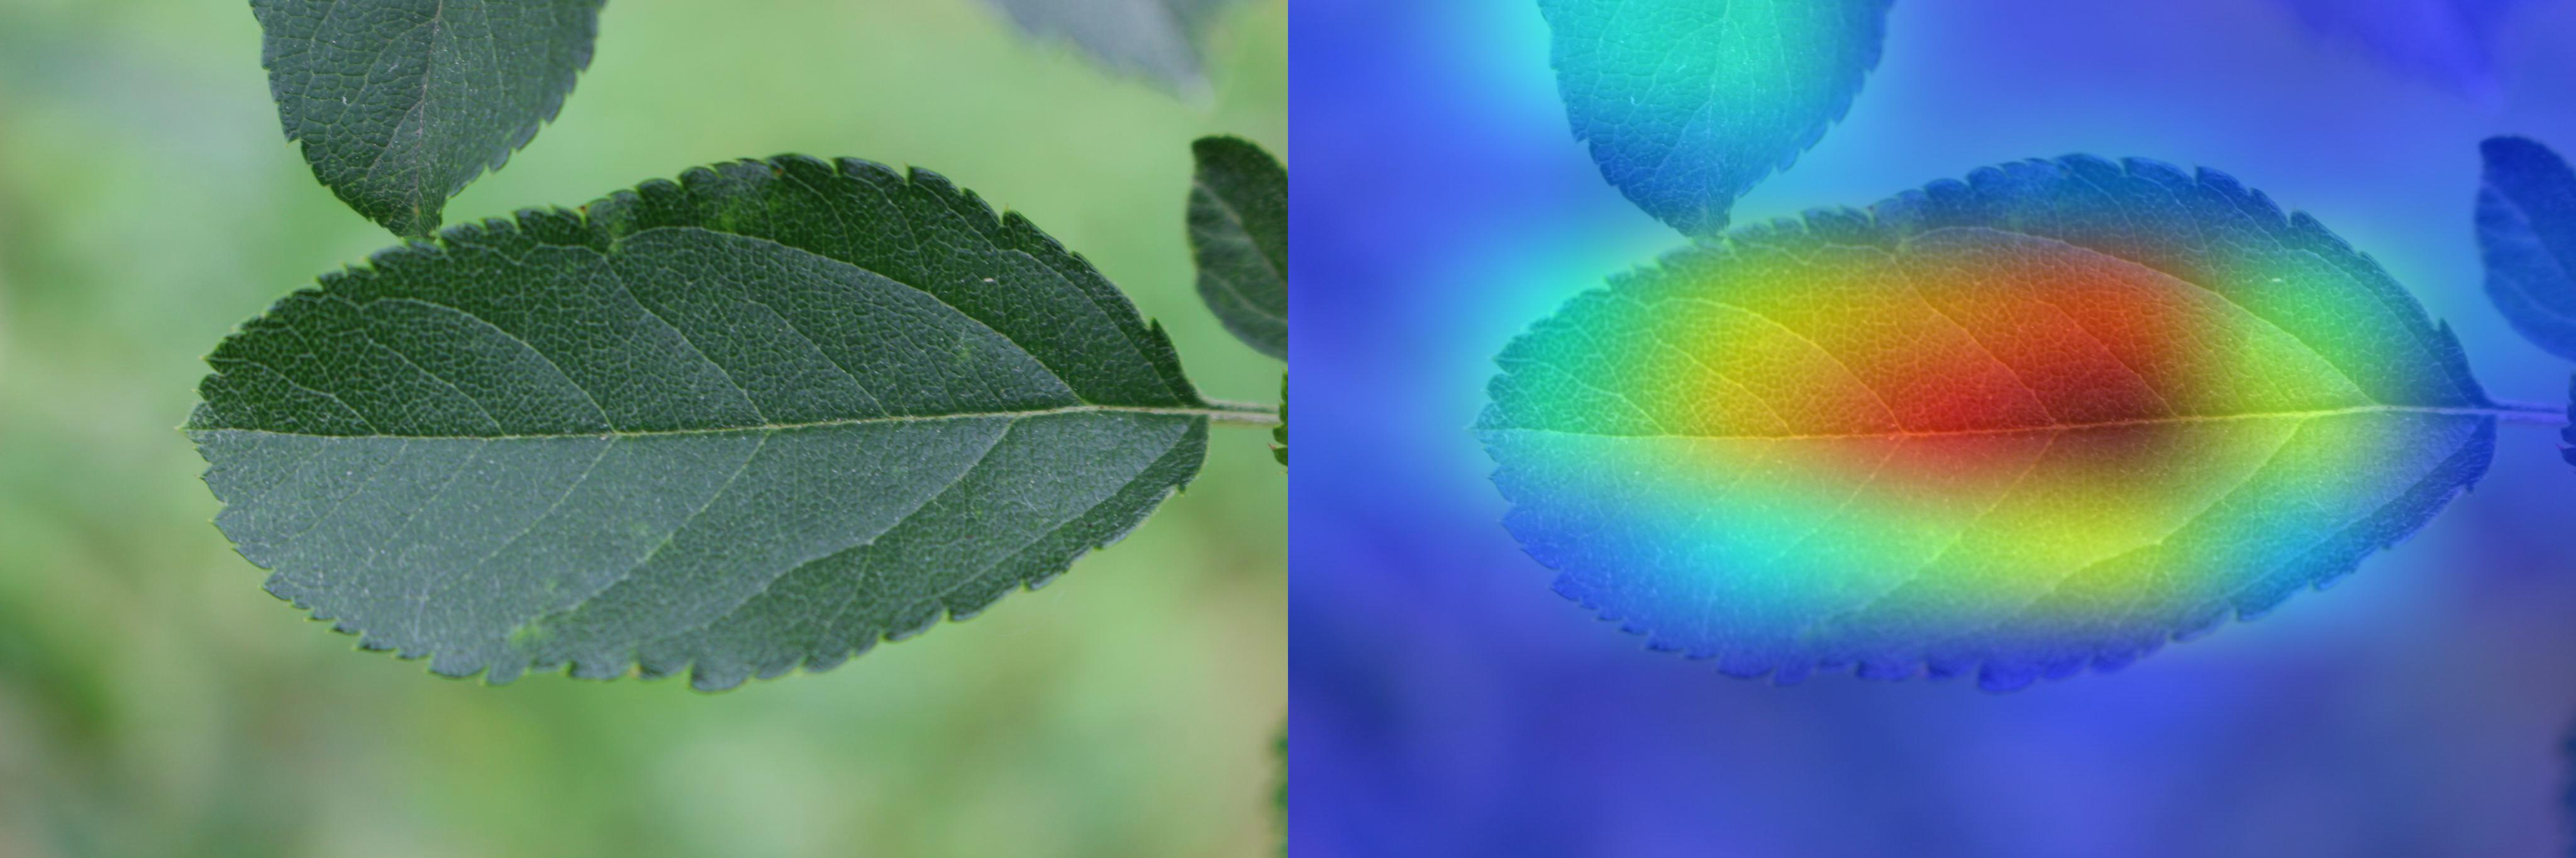

In [102]:
grad_cam.showGradCam(model2, img_path = r"F:\notebooks\capstone\data\fgvc7\images\Test_3.jpg")

Predicted: rust


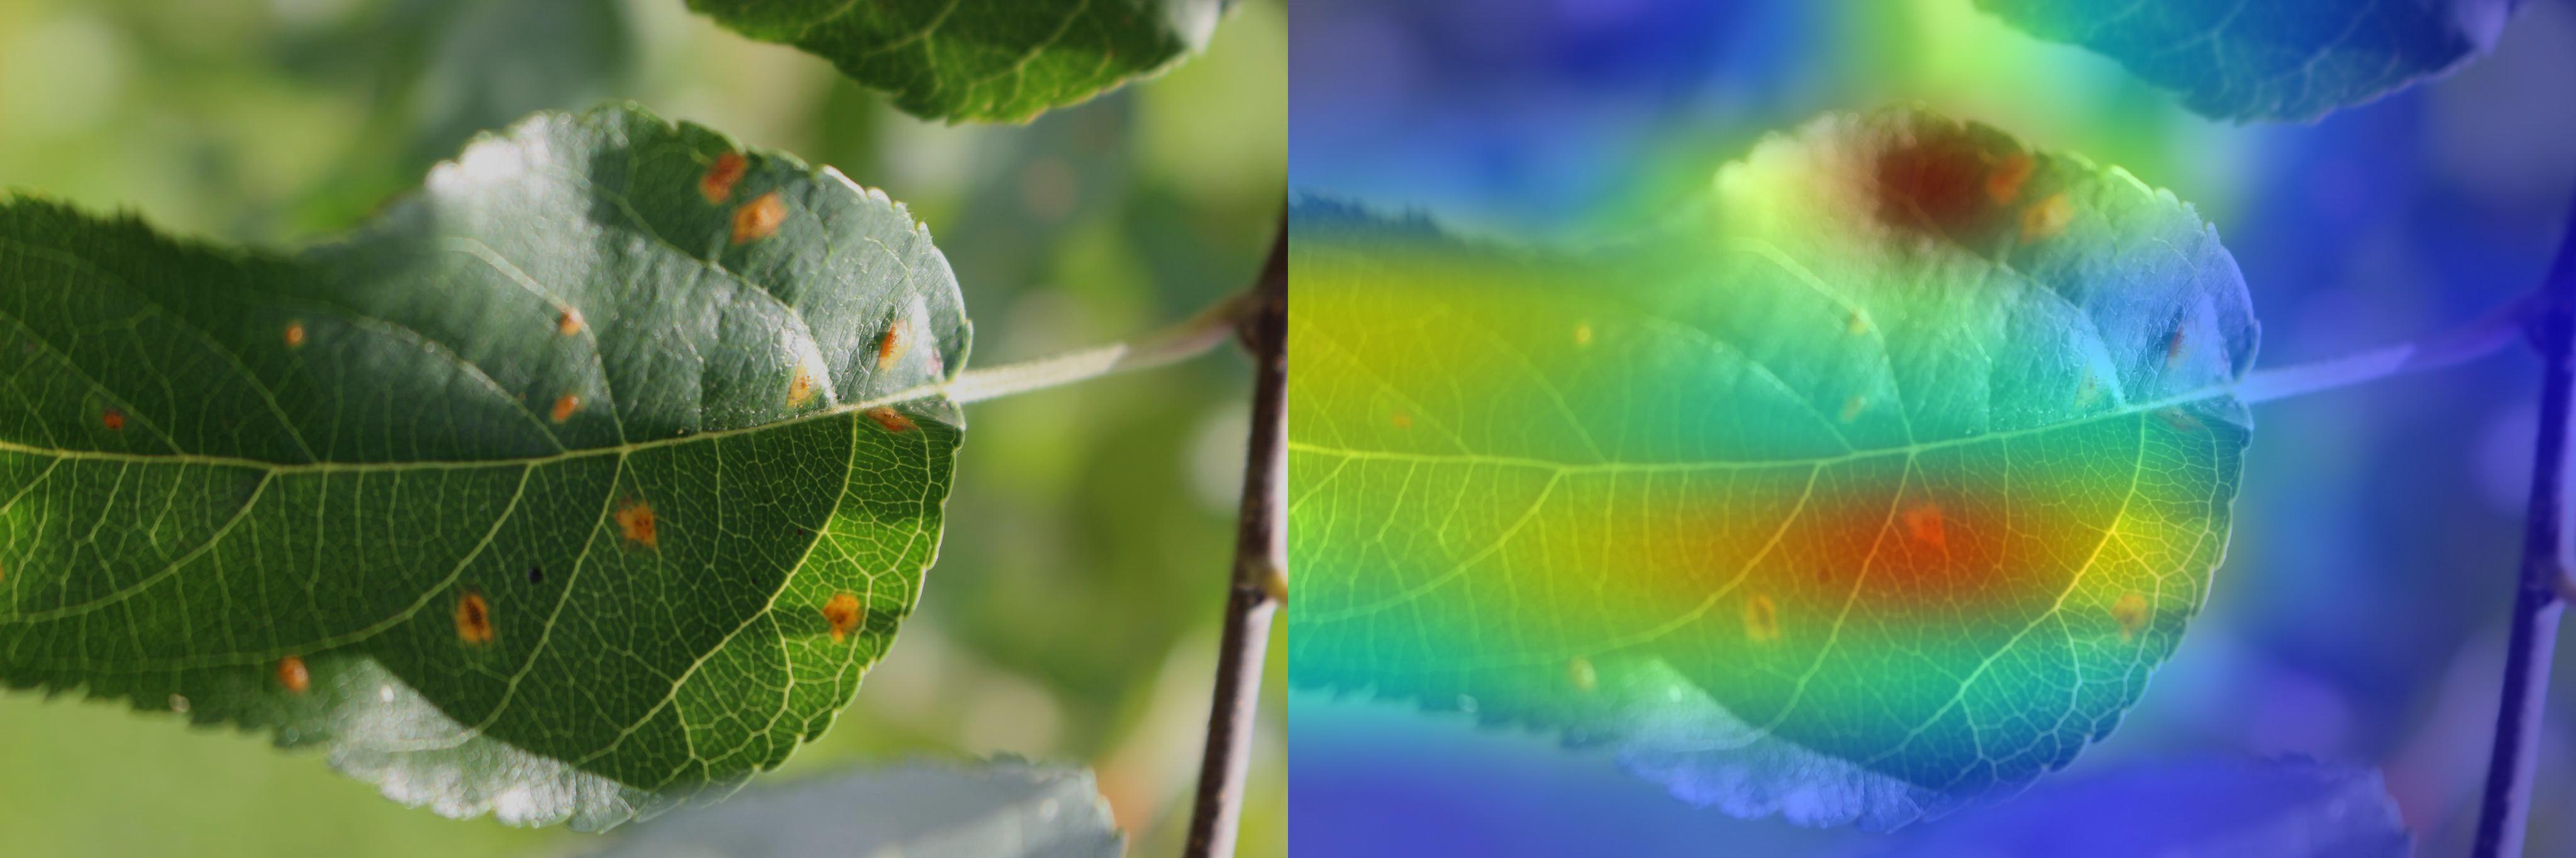

In [103]:
grad_cam.showGradCam(model2, img_path = r"F:\notebooks\capstone\data\fgvc7\images\Test_4.jpg")